In [12]:
from collections import defaultdict
import os
import json
import sys
from decentralizepy.graphs.MobilityGraph import MobilityGraph
import numpy as np
import matplotlib.pyplot as plt    

from animate_graph import find_last_graph_file


def average_of_first_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[:n])

def average_of_last_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[-n:])

num_nodes = 48
graphs_dir = ".sim"
high_mobility_proportion = 0.05

def high_mobility_nodes(g: MobilityGraph):
    n = int(len(g.nodes) * high_mobility_proportion)
    return g.nodes[:n]

def low_mobility_nodes(g: MobilityGraph):  
    n_low = int(len(g.nodes) * high_mobility_proportion)
    return g.nodes[n_low:]

graphs: list[MobilityGraph] = []
last_graph_file_number = find_last_graph_file(graphs_dir)
for i in range(1, last_graph_file_number + 1):
    file_path = os.path.join(graphs_dir, f"graph_{i}.txt")
    if os.path.exists(file_path):
        g = MobilityGraph()
        g.read_graph_from_file(file_path)
        graphs.append(g)
    else:
        print(f"File graph_{i}.txt does not exist in the directory.")
        sys.exit(1)

n = len(graphs)
high_mobility_neighbors = [defaultdict(set) for _ in range(n)]
low_mobility_neighbors = [defaultdict(set) for _ in range(n)]

for (i, g) in enumerate(graphs):
    h_nodes = high_mobility_nodes(g)
    l_nodes = low_mobility_nodes(g)

    # print("High mobility nodes:", [node.uid for node in h_nodes])
    # print("High mobility nodes velocities:", [node.velocity for node in h_nodes])
    # print("Low mobility nodes:", [node.uid for node in l_nodes])
    # print("Low mobility nodes velocities:", [node.velocity for node in l_nodes])
    print(i)

    for node in h_nodes:
        high_mobility_neighbors[i][node.uid] = set(g.neighbors(node.uid))
        # print(f"neighbours {node}", high_mobility_neighbors[i][node.uid])
    
    for node in l_nodes:
        low_mobility_neighbors[i][node.uid] = set(g.neighbors(node.uid))
        # print(f"neighbours {node}", high_mobility_neighbors[i][node.uid])

    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

[1.5, 2.0, 1.5, 2.5, 1.0, 2.0, 1.0, 2.0, 3.0, 2.5, 0.5, 1.5, 3.5, 3.5, 6.0, 3.0, 4.5, 5.5, 1.5, 2.0, 1.0, 0.5, 1.0, 0.0, 2.0, 0.5, 1.5, 3.0, 0.0, 1.0, 1.0, 0.0, 0.5, 0.5, 1.0, 2.0, 1.5, 1.0, 2.5, 2.0, 3.5, 2.5, 1.0, 1.5, 2.0, 3.0, 3.0, 1.5, 0.0, 1.0, 0.5, 0.5, 1.5, 0.5, 1.0, 1.5, 0.0, 2.0, 1.0, 0.5, 1.0, 1.5, 1.0, 1.5, 1.0, 1.5, 1.0, 0.5, 1.0, 1.5, 1.0, 2.5, 4.0, 1.0, 0.0, 0.5, 0.0, 1.5, 1.0, 2.0, 1.0, 1.0, 1.0, 1.5, 2.0, 1.0, 1.0, 3.5, 0.5, 3.5, 2.0, 0.5, 1.0, 0.5, 1.0, 1.5, 1.5, 2.0, 2.0, 2.0, 1.5, 1.5, 2.5, 1.5, 1.0, 1.5, 2.5, 3.5, 0.5, 2.5, 1.0, 5.0, 3.0, 1.0, 2.0, 1.0, 1.0, 3.0, 0.5, 1.5, 0.5, 0.5, 0.0, 1.5, 2.0, 5.0, 2.5, 3.5, 2.5, 1.5, 3.0, 3.5, 5.0, 3.5, 1.0, 1.5, 4.0, 3.0, 6.5, 2.5, 3.5, 3.5, 6.5, 3.0, 0.5, 2.0, 0.0, 1.5, 1.0, 7.0, 4.0, 3.0, 0.5, 0.5, 1.0, 0.0, 1.5, 1.5, 1.5, 5.0, 1.5, 1.0, 1.0, 0.0, 0.5, 0.0, 2.0, 1.0, 1.5, 0.5, 1.5, 0.0, 0.5, 1.0, 3.0, 1.0, 0.5, 0.5, 2.0, 0.5, 0.0, 0.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 1.0, 0.0,

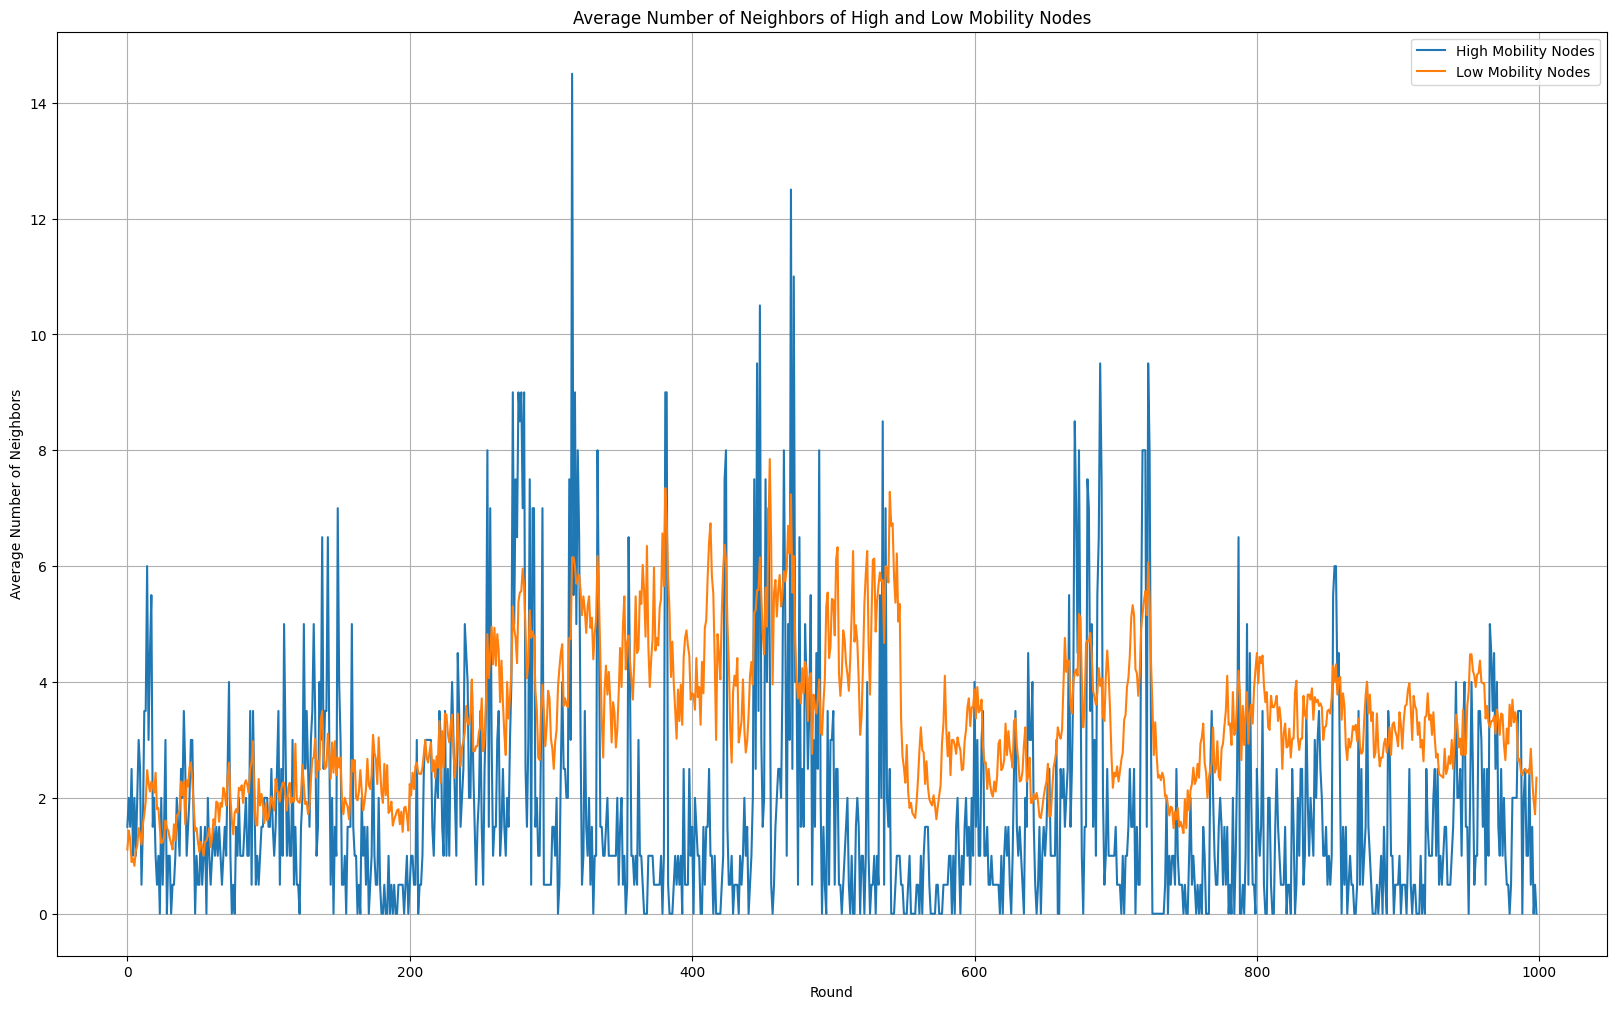

In [9]:
plt.figure(figsize=(20, 12))

average_num_neighbors_high_mobility = [np.mean([len(high_mobility_neighbors[i][node.uid]) for node in high_mobility_nodes(g)]) for i, g in enumerate(graphs)]
average_num_neighbors_low_mobility = [np.mean([len(low_mobility_neighbors[i][node.uid]) for node in low_mobility_nodes(g)]) for i, g in enumerate(graphs)]

print(average_num_neighbors_high_mobility)
print(average_num_neighbors_low_mobility)

plt.plot(average_num_neighbors_high_mobility, label="High Mobility Nodes")
plt.plot(average_num_neighbors_low_mobility, label="Low Mobility Nodes")

plt.xlabel("Round")
plt.ylabel("Average Number of Neighbors")
plt.title("Average Number of Neighbors of High and Low Mobility Nodes")
plt.legend()
plt.grid(True)
plt.show()


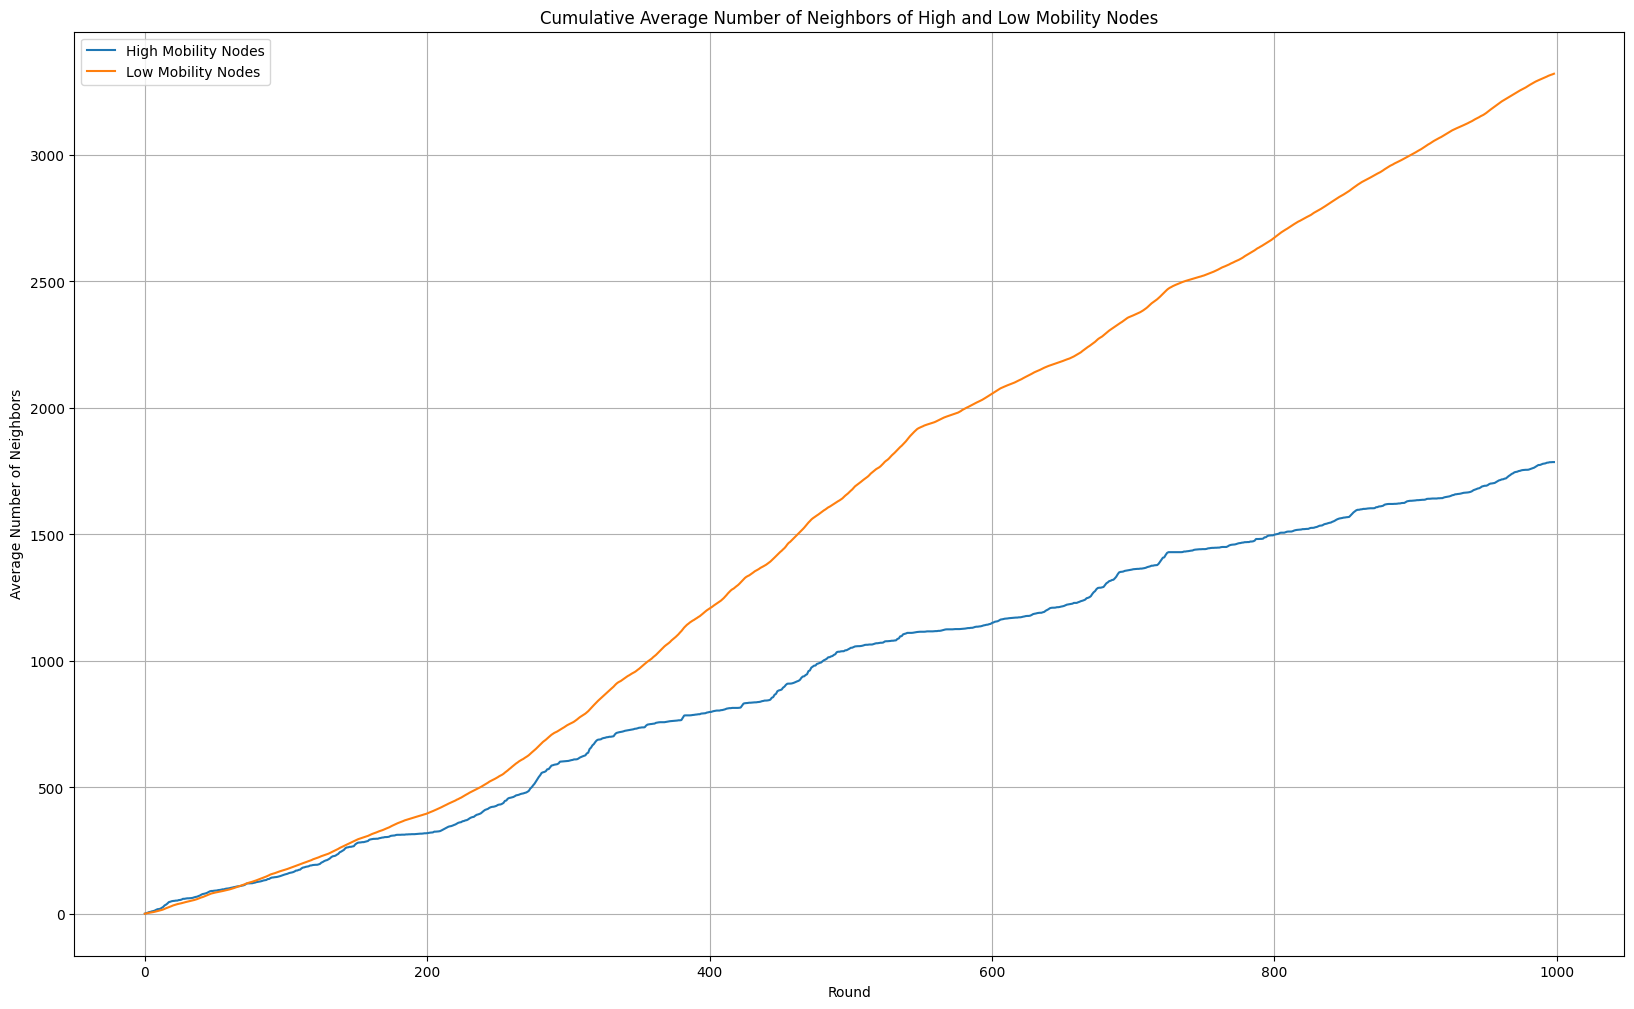

In [10]:
cumulative_num_neighbors_high_mobility = np.cumsum(np.array(average_num_neighbors_high_mobility))
cumulative_num_neighbors_low_mobility = np.cumsum(np.array(average_num_neighbors_low_mobility))

plt.figure(figsize=(20, 12))

plt.plot(cumulative_num_neighbors_high_mobility, label="High Mobility Nodes")
plt.plot(cumulative_num_neighbors_low_mobility, label="Low Mobility Nodes")

plt.xlabel("Round")
plt.ylabel("Average Number of Neighbors")
plt.title("Cumulative Average Number of Neighbors of High and Low Mobility Nodes")
plt.legend()
plt.grid(True)


[38.01380632811248, 95.5698363465792, 38.01380632811248, 55.39758274858779, 38.01380632811248, 38.01380632811248, 55.39758274858779, 73.7555157021674, 38.01380632811248, 38.01380632811248, 95.5698363465792, 60.750405724987864, 73.7555157021674, 73.7555157021674, 38.01380632811248, 73.7555157021674, 38.01380632811248, 55.39758274858779, 95.5698363465792, 38.01380632811248, 38.01380632811248, 95.5698363465792, 95.56983634657918, 95.5698363465792, 95.5698363465792, 95.5698363465792, 59.828126972524274, 59.828126972524274, 95.5698363465792, 95.5698363465792, 95.5698363465792, 95.5698363465792, 73.75551570216743, 73.75551570216743, 73.75551570216743, 73.75551570216743, 95.5698363465792, 73.75551570216743, 37.21161813221184, 37.21161813221184, 38.01380632811251, 95.5698363465792, 73.75551570216743, 38.01380632811251, 37.21161813221184, 37.21161813221184, 95.5698363465792, 95.5698363465792, 95.5698363465792, 95.5698363465792, 90.97341412365736, 95.5698363465792, 59.828126972524274, 95.5698363

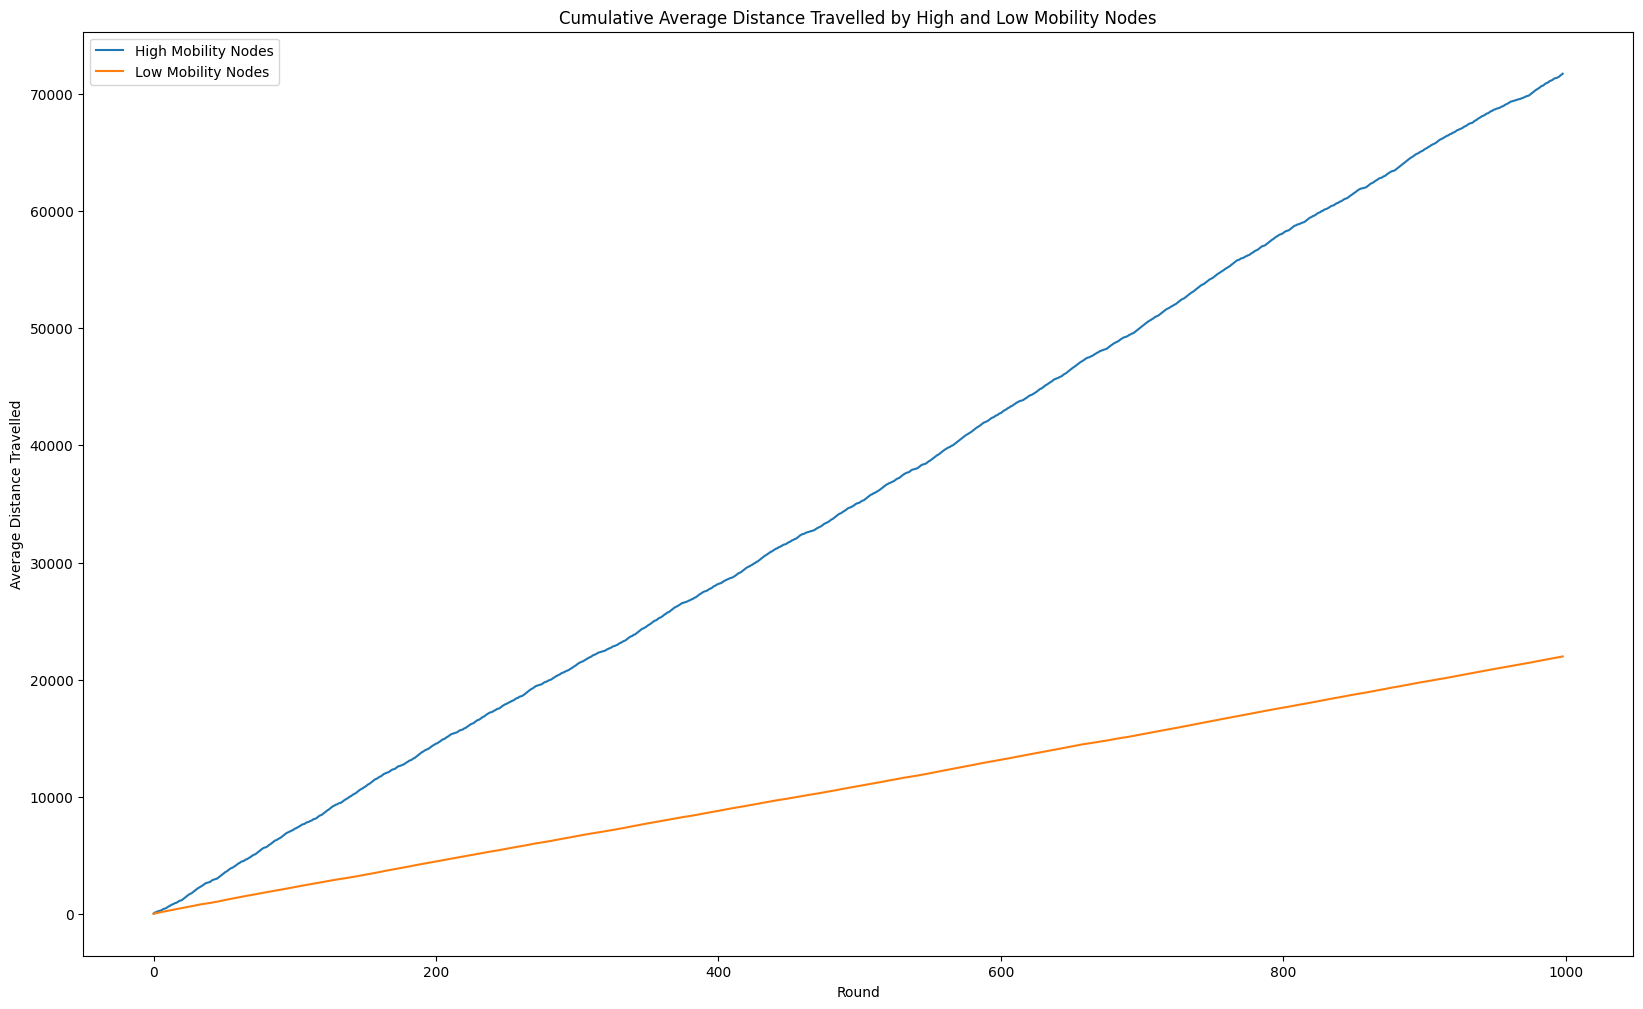

In [11]:
from decentralizepy.graphs.MobilityNode import MobilityNode


def get_node_distance_travelled(node: MobilityNode):
    return np.linalg.norm(np.array(node.pos_vec) - np.array(node.previous_pos_vec))

high_mobility_nodes_distances = [np.mean([get_node_distance_travelled(node) for node in high_mobility_nodes(g)]) for g in graphs]
low_mobility_nodes_distances = [np.mean([get_node_distance_travelled(node) for node in low_mobility_nodes(g)]) for g in graphs]
print(high_mobility_nodes_distances)
print(low_mobility_nodes_distances)

cum_high_mobility_nodes_distances = np.cumsum(np.array(high_mobility_nodes_distances))
cum_low_mobility_nodes_distances = np.cumsum(np.array(low_mobility_nodes_distances))

plt.figure(figsize=(20, 12))

plt.plot(cum_high_mobility_nodes_distances, label="High Mobility Nodes")
plt.plot(cum_low_mobility_nodes_distances, label="Low Mobility Nodes")

plt.xlabel("Round")
plt.ylabel("Average Distance Travelled")
plt.title("Cumulative Average Distance Travelled by High and Low Mobility Nodes")
plt.legend()
plt.show()